Este colab fue desarrollado por Arnold Charry Armero.

# Maximum Flow Problem

En el Maximum Flow Problem se supone que se tiene capacidad infinita para abastecer el último nodo. La idea es transportar, cumpliendo con la capacidad máxima de cada arco, el máximo número de unidades del nodo O al nodo T. Esto se puede ver en la siguiente imagen.

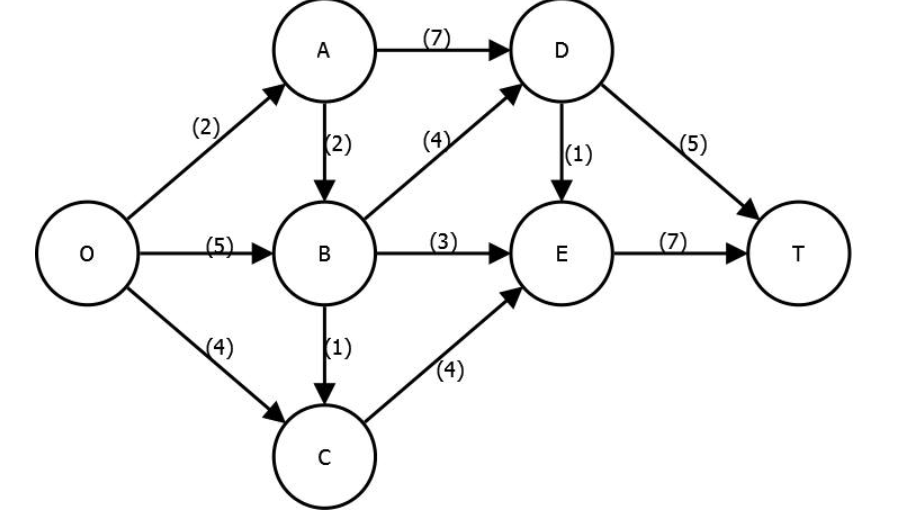

## Conjuntos

$ i = \textrm{Conjunto de nodos, indexado por} \:  i$

$ j = \textrm{Conjunto de nodos, indexado por} \:  j$

## Parámetros

$ U_{ij} = \textrm{Capacidad para transportar desde el nodo } i \textrm{ hasta el nodo } j$

$ B_{ij} = \textrm{1 si se puede transportar desde el nodo } i \textrm{ hasta el nodo } j$

## Variables de decisión

$ x_{ij} = \textrm{1 si se transporta desde el nodo } i \textrm{ hasta el nodo } j, \textrm{0 lo contrario}$

## Función Objetivo


$$ \text{max} \: z = \sum_{i}^{n}x_{it} $$

## Restricciones

Un nodo que sale es igual a uno que entra,

$$ \sum_{i}^{} x_{ik} - \sum_{j}^{}x_{kj}  = 0, \: \forall k $$

Lo llevado en cada arco tiene un peso máximo,

$$ x_{ij} ≤ B_{ij} \:u_{ij}, ∀i \:∀j$$

In [ ]:
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 57.4 MB/s eta 0:00:00


In [ ]:
# Se importan las librerías
from gurobipy import *

In [ ]:
#Conjuntos
nodos1 = range(7)
nodos2 = range(7)

In [ ]:
U = [[0, 2, 5, 4, 0, 0, 0],
      [0, 0, 2, 0, 7, 0, 0],
      [0, 0, 0, 1, 4, 3, 0],
      [0, 0, 0, 0, 0, 4, 0],
      [0, 0, 0, 0, 0, 1, 5],
      [0, 0, 0, 0, 0, 0, 7],
      [0, 0, 0, 0, 0, 0, 0]]

#Matriz de coef. binarios
B = []
for i in range(7):
  B.append([])
  for j in range(7):
    if U[i][j] != 0:
      B[i].append(1)
    else:
      B[i].append(0)

In [ ]:
# Crear la instancia del modelo
model = Model("Shortest_Path_Problem")

# Inicialización de las variables de decisión
X = model.addVars(nodos1, nodos2, vtype=GRB.INTEGER, name="X")

# Se define el nodo de entrada y el de salida
s = 0
t = 6

# Agregar la función objetivo
model.setObjective(quicksum(X[i, t] for i in nodos1), GRB.MAXIMIZE)

# Agregar las restricciones

for i in nodos1:
    for j in nodos2:
        model.addConstr(X[i,j] <= B[i][j] * U[i][j], name=f"cap_{i}_{j}")

for k in nodos1:
    if k in (s,t):
        continue
    model.addConstr(quicksum(X[i,k] for i in nodos1) - quicksum(X[k,j] for j in nodos2) == 0,
                    name=f"flow_cons_{k}")

# Resolver el problema
model.optimize()

# Imprimir el estado del problema
if model.Status == GRB.OPTIMAL:
    print("Status: Optimal")

# Resultados
for i in nodos1:
    for j in nodos2:
        if X[i,j].X > 1e-9:   # imprime solo arcos activos
            print((i,j), "flow=", X[i,j].X)

print(f"\nFunción Objetivo = {model.objVal:.2f}")

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 54 rows, 49 columns and 109 nonzeros
Model fingerprint: 0x5c4736de
Variable types: 0 continuous, 49 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 7e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 50 rows and 41 columns
Presolve time: 0.00s
Presolved: 4 rows, 8 columns, 13 nonzeros
Found heuristic solution: objective 4.0000000
Variable types: 0 continuous, 8 integer (1 binary)

Root relaxation: objective 1.100000e+01, 4 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd 